1.3.1 Задание
Задайте 4 точки в трехмерном пространстве, рассчитайте между ними
расстояния по описанным в примере выше метрикам. Отобразите точки
в трехмерном пространстве.

Расстояния между точками A и B:
Евклидово расстояние: 5.196152422706632
Квадрат евклидова расстояния: 27.0
Манхэттенское расстояние: 9
Расстояние Чебышева: 3

Расстояния между точками A и C:
Евклидово расстояние: 7.483314773547883
Квадрат евклидова расстояния: 56.0
Манхэттенское расстояние: 12
Расстояние Чебышева: 6

Расстояния между точками A и D:
Евклидово расстояние: 3.7416573867739413
Квадрат евклидова расстояния: 14.0
Манхэттенское расстояние: 6
Расстояние Чебышева: 3

Расстояния между точками B и C:
Евклидово расстояние: 12.449899597988733
Квадрат евклидова расстояния: 155.0
Манхэттенское расстояние: 21
Расстояние Чебышева: 9

Расстояния между точками B и D:
Евклидово расстояние: 8.774964387392123
Квадрат евклидова расстояния: 77.00000000000001
Манхэттенское расстояние: 15
Расстояние Чебышева: 6

Расстояния между точками C и D:
Евклидово расстояние: 3.7416573867739413
Квадрат евклидова расстояния: 14.0
Манхэттенское расстояние: 6
Расстояние Чебышева: 3


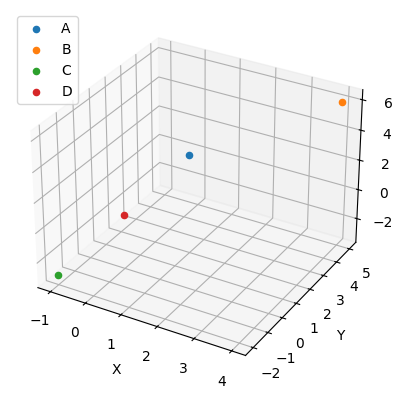

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Задаем координаты точек
points = {
    'A': np.array([1, 2, 3]),
    'B': np.array([4, 5, 6]),
    'C': np.array([-1, -2, -3]),
    'D': np.array([0, 0, 0])
}

# Рассчитываем расстояния между точками по различным метрикам
distances = {}
for pair in [('A', 'B'), ('A', 'C'), ('A', 'D'), ('B', 'C'), ('B', 'D'), ('C', 'D')]:
    p1, p2 = pair
    distances[pair] = {
        'euc': np.linalg.norm(points[p1] - points[p2]),
        'euc2': np.linalg.norm(points[p1] - points[p2])**2,
        'man': np.sum(np.abs(points[p1] - points[p2])),
        'che': np.max(np.abs(points[p1] - points[p2]))
    }

# Выводим расстояния между точками
for pair, dist in distances.items():
    p1, p2 = pair
    print(f'Расстояния между точками {p1} и {p2}:')
    print(f'Евклидово расстояние: {dist["euc"]}')
    print(f'Квадрат евклидова расстояния: {dist["euc2"]}')
    print(f'Манхэттенское расстояние: {dist["man"]}')
    print(f'Расстояние Чебышева: {dist["che"]}')
    print()

# Отображение точек в трехмерном пространстве
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for point, coord in points.items():
    ax.scatter(coord[0], coord[1], coord[2], label=point)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
plt.show()

2.3.1 Задание
Для предыдущего примера поэкспериментируйте с параметрами
классификатора:
1. Установите другое количество ближайших соседей (k = 1, 5, 10).
2. Установите размер тестовой выборки 15% от всего датасета.
3. Постройте графики и оцените качество моделей, проанализируйте
результаты.

Количество соседей: 1, Размер тестовой выборки: 100%
Точность модели: 1.000


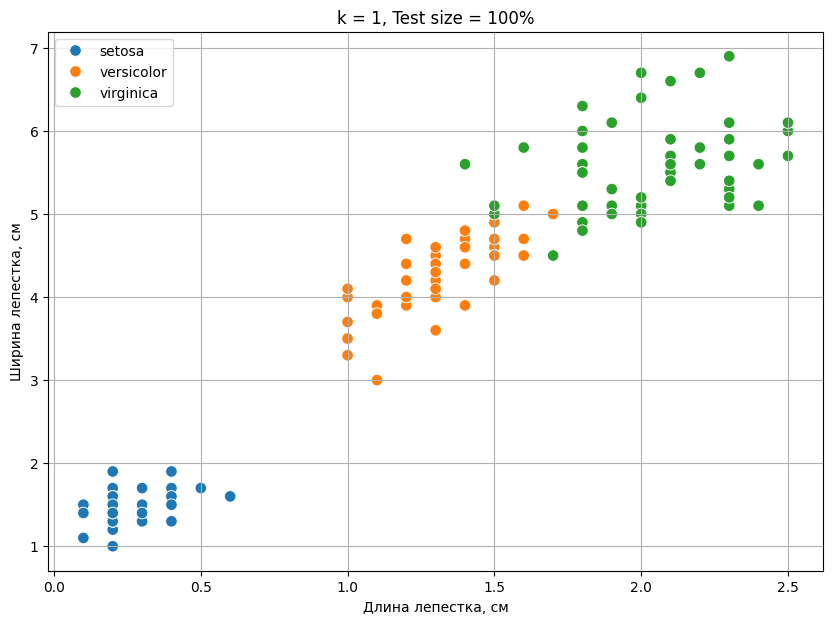

Количество соседей: 5, Размер тестовой выборки: 15.0%
Точность модели: 1.000


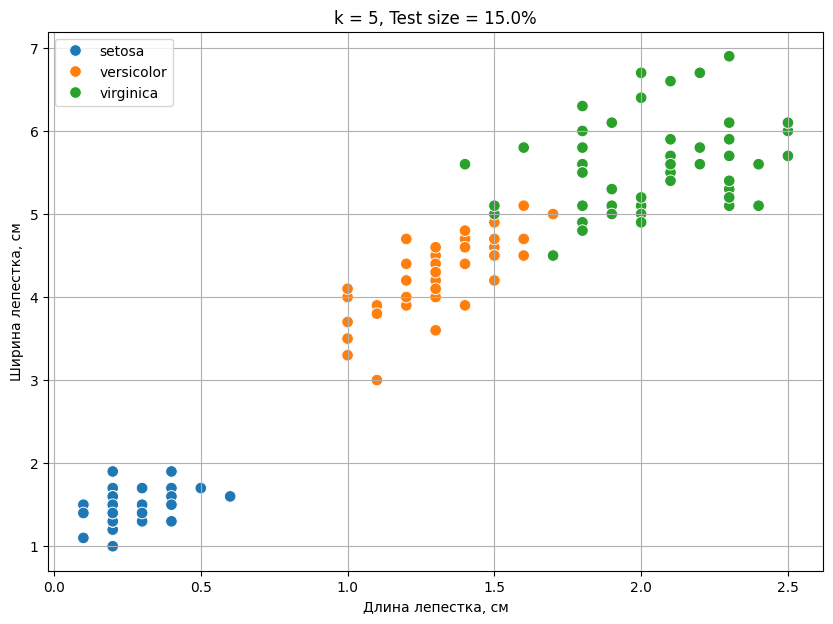

Количество соседей: 100, Размер тестовой выборки: 15.0%
Точность модели: 0.652


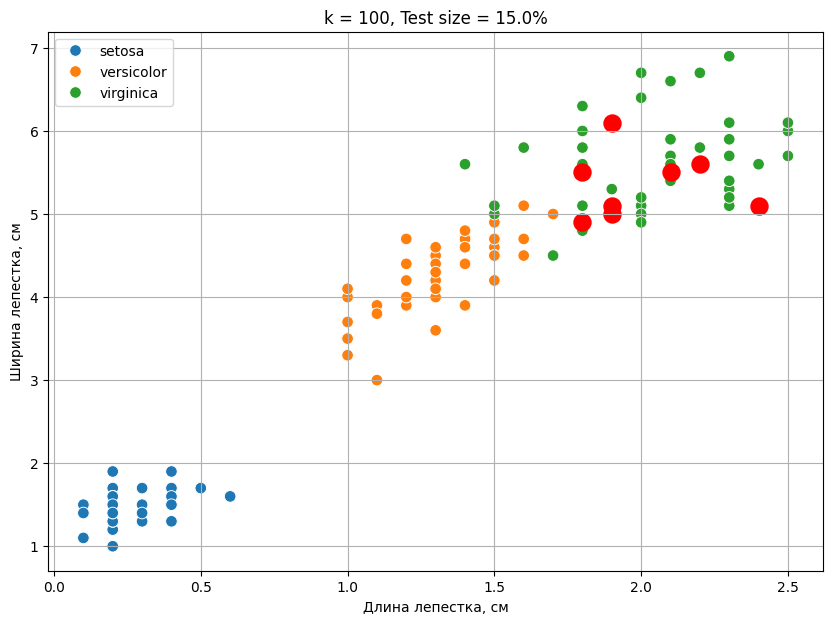

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Загрузим данные Iris
iris = load_iris()
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                       columns= iris['feature_names'] + ['target'])
iris_df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Эксперимент с различными параметрами классификатора

# Список параметров для эксперимента
params = [(1, 1), (5, 0.15), (100, 0.15)]

# Проходим по каждому набору параметров
for param in params:
    k_neighbors, test_size = param
    
    # Разделим данные на обучающий и тестовый наборы
    X_train, X_test, y_train, y_test = train_test_split(
        iris_df.iloc[:, :-1],
        iris_df.iloc[:, -1],
        test_size=test_size
    )

    # Создадим и обучим модель k-ближайших соседей
    model = KNeighborsClassifier(n_neighbors=k_neighbors)
    model.fit(X_train, y_train)

    # Получим предсказания на тестовом наборе
    y_pred = model.predict(X_test)

    # Посчитаем точность модели
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Количество соседей: {k_neighbors}, Размер тестовой выборки: {test_size * 100}%')
    print(f'Точность модели: {accuracy:.3f}')

    # Визуализируем результаты
    plt.figure(figsize=(10,7))
    sns.scatterplot(x=iris_df.columns[3], y=iris_df.columns[2], data=iris_df, hue='species', s=70)
    plt.xlabel('Длина лепестка, см')
    plt.ylabel('Ширина лепестка, см')
    plt.title(f'k = {k_neighbors}, Test size = {test_size * 100}%')
    plt.legend(loc=2)
    plt.grid()

    # Отметим неверно классифицированные точки тестового набора
    for i in range(len(y_test)):
        if y_test.iloc[i] != y_pred[i]:
            plt.scatter(X_test.iloc[i, 3], X_test.iloc[i, 2], color='red', s=150)

    plt.show()

3.3.2 Задание
Определите набор признаков человека, по аналогии из РТ 1, – например,
цвет глаз и конвертируйте его в матрицу признаков.

In [14]:
from sklearn.feature_extraction import DictVectorizer

data = [{"ум":0, "красота":10},
{"ум":2, "красота":8},
{"ум":4, "красота":6},
{"ум":10, "красота":0}]
dict_vectorizer = DictVectorizer(sparse=False)
features = dict_vectorizer.fit_transform(data)
features

array([[10.,  0.],
       [ 8.,  2.],
       [ 6.,  4.],
       [ 0., 10.]])